In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Cleaned_Top_Ranked_Real_Movies_Dataset.csv')

In [4]:
data.describe()


,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross
count,821.000000,821.000000,821.000000,821.000000,8.210000e+02,8.210000e+02
mean,1993.563946,124.325213,7.964677,78.058465,3.460648e+05,7.013088e+07
std,21.463636,27.545000,0.288976,11.536115,3.735838e+05,1.111655e+08
min,1921.000000,45.000000,7.600000,28.000000,1.700000e+04,0.000000e+00
25%,1983.000000,104.000000,7.700000,72.000000,7.894200e+04,3.360000e+06
50%,2000.000000,121.000000,7.900000,79.000000,2.100850e+05,2.461000e+07
75%,2010.000000,138.000000,8.100000,86.000000,4.943190e+05,8.630000e+07
max,2023.000000,242.000000,9.300000,100.000000,2.559534e+06,9.366600e+08


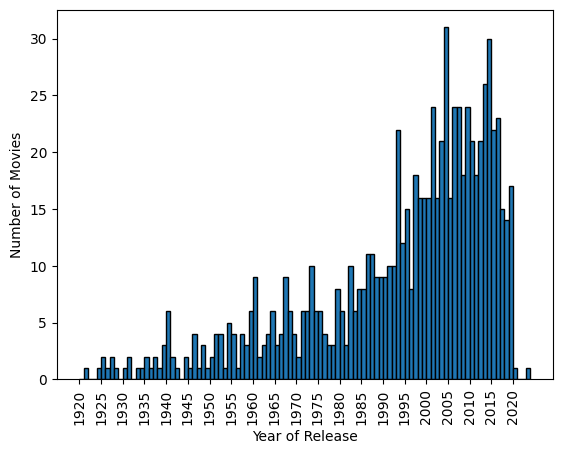

In [5]:
plt.hist(data['Year of Release'],bins=range(1920,2025),edgecolor='black')
plt.xticks(range(1920, 2025, 5), rotation=90)
plt.yticks(range(0, 35, 5))
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.show()



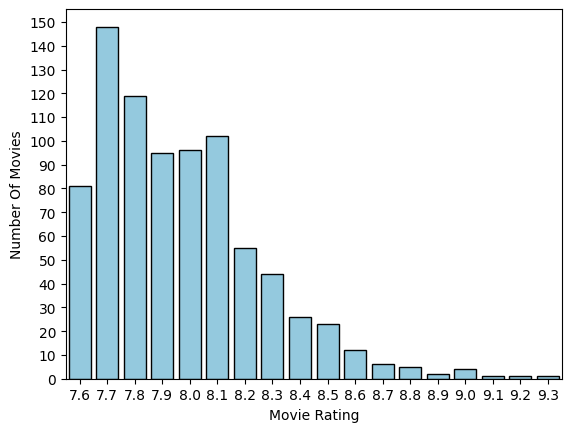

In [6]:
sns.countplot(x=data['Movie Rating'],color='skyblue',edgecolor='black')
plt.ylabel('Number Of Movies')
plt.yticks(range(0, 160, 10))
plt.show()


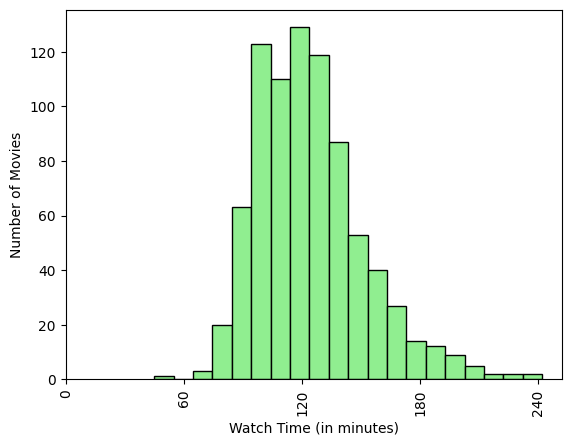

In [7]:
plt.hist(data['Watch Time'],bins=20,edgecolor='black',color='lightgreen')
plt.xlabel('Watch Time (in minutes)')
plt.ylabel('Number of Movies')
plt.xticks(range(0, 300, 60), rotation=90)
plt.show()

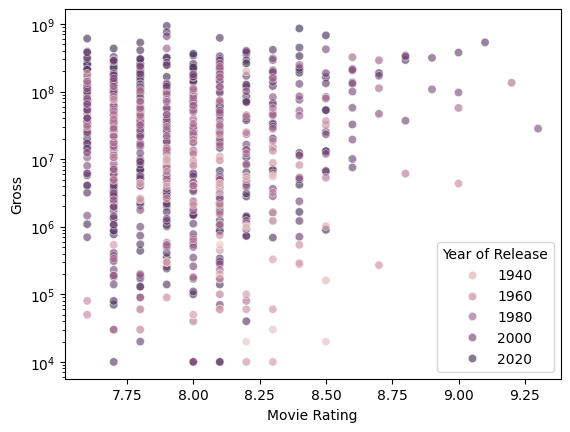

In [8]:
sns.scatterplot(x=data['Movie Rating'],y=data['Gross'],alpha=0.6,hue=data['Year of Release'])
plt.yscale("log")
plt.show()

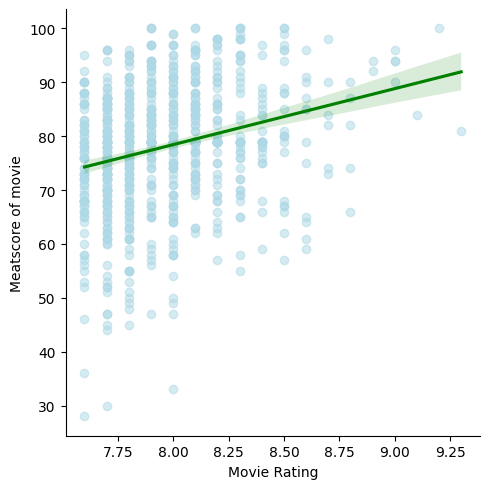

In [9]:
sns.lmplot(x="Movie Rating", y="Meatscore of movie", data=data, scatter_kws={'alpha':0.5,'color':'lightblue'}, line_kws={'color':'green'})
plt.show()

C:\Users\store\AppData\Local\Temp\ipykernel_16868\1437897135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='Decade',y='Gross',palette="Set2")


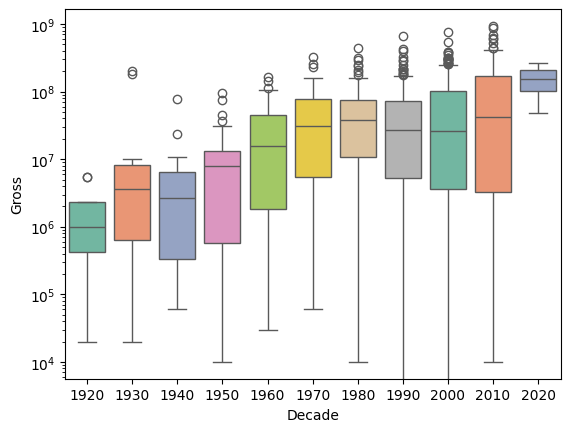

In [10]:
data['Decade'] = (data['Year of Release'] // 10) * 10
sns.boxplot(data=data,x='Decade',y='Gross',palette="Set2")
plt.yscale("log")
plt.show()

C:\Users\store\AppData\Local\Temp\ipykernel_16868\978029841.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='Decade',y='Watch Time',palette="Set2")


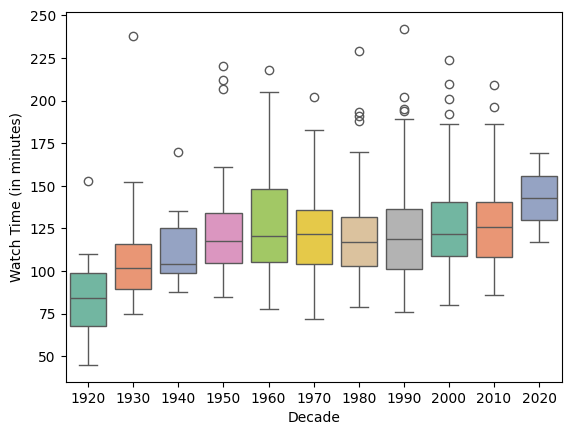

In [11]:
sns.boxplot(data=data,x='Decade',y='Watch Time',palette="Set2")
plt.ylabel('Watch Time (in minutes)')
plt.show()

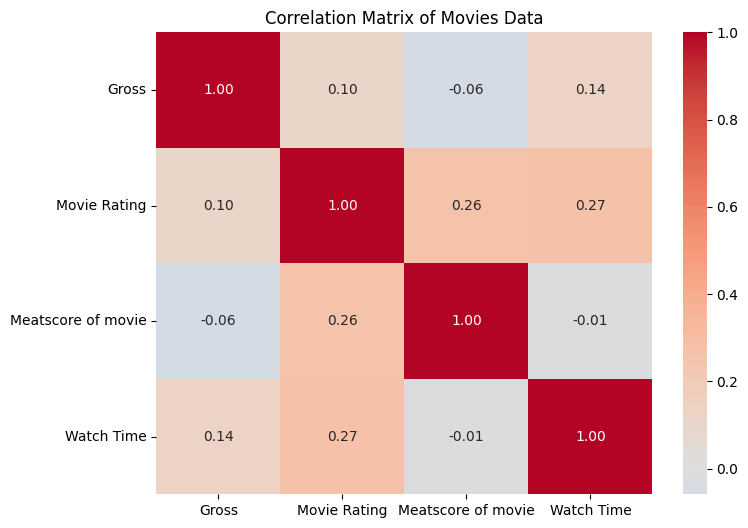

In [12]:
numeric_cols = ['Gross', 'Movie Rating', 'Meatscore of movie', 'Watch Time']
corr = data[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Matrix of Movies Data")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


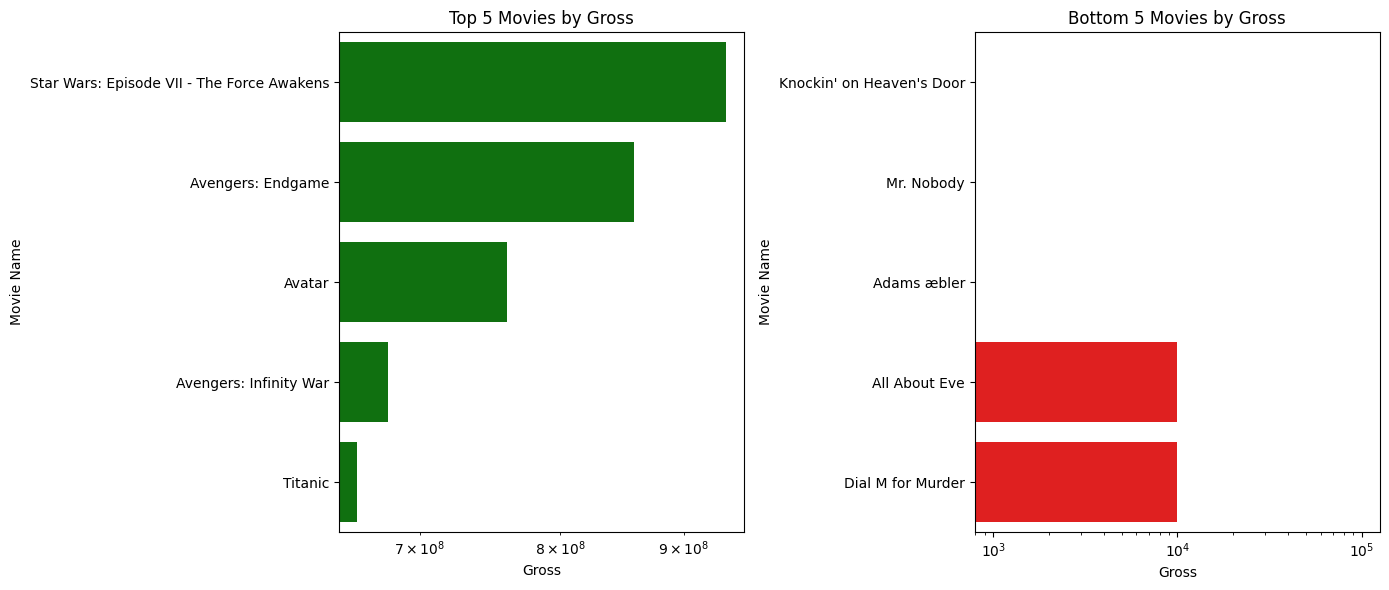

In [13]:
top5_gross = data.nlargest(5, 'Gross')
bottom5_gross = data.nsmallest(5, 'Gross')

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=top5_gross, x='Gross', y='Movie Name', ax=axes[0], color="green")
axes[0].set_title("Top 5 Movies by Gross")
axes[0].set_xscale("log")

sns.barplot(data=bottom5_gross, x='Gross', y='Movie Name', ax=axes[1], color="red")
axes[1].set_title("Bottom 5 Movies by Gross")
axes[1].set_xscale("log")
plt.tight_layout()
plt.show()


In [14]:
data.to_csv('Cleaned_Top_Ranked_Real_Movies_Dataset.csv', index=False)